In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

### Import Data

In [3]:
fashion_data = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_data.load_data()

In [4]:
class_names = ['Tshirt/Tops', 'Trouser', 'Pullover', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### Data Reshaping

* In CNN we need 3 dimensional arrays, two for image pixels and one for channels.
* As the images are greyshade, here only one channel is required.

In [5]:
x_train_full = x_train_full.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

### Data Normalization

In [6]:
x_train_n = x_train_full/255
x_test_n = x_test/255

### Spliting the data

In [7]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

## Creating the Model

In [8]:
np.random.seed(0)
tf.random.set_seed(0)

### Architecture
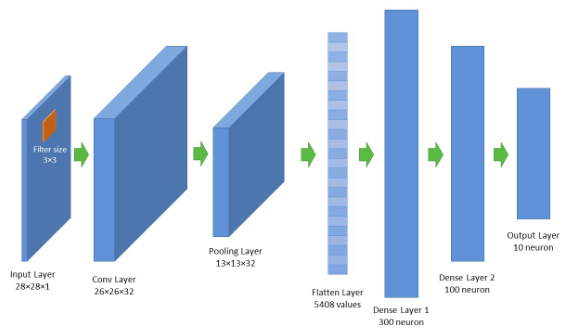

* We will be using a filter size of 3x3 with a stride of 1.
* In convolutional layer, we will be doing valid padding hence reduceing the dimension to 26x26 and we will use 32 different filters.
* After that we will have a pooling layer with 2x2 window.

### Model building and compiling

In [9]:
model_cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation = 'relu'),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
# The pooling layer is important as it decreases the computation time.

In [10]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [12]:
model_cnn_history = model_cnn.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data = (x_valid, y_valid))

Epoch 1/20
860/860 [==============================] - 20s 23ms/step - loss: 0.8614 - accuracy: 0.7133 - val_loss: 0.5512 - val_accuracy: 0.8014
Epoch 2/20
860/860 [==============================] - 19s 22ms/step - loss: 0.5305 - accuracy: 0.8081 - val_loss: 0.6211 - val_accuracy: 0.7818
Epoch 3/20
860/860 [==============================] - 19s 22ms/step - loss: 0.4752 - accuracy: 0.8304 - val_loss: 0.5140 - val_accuracy: 0.8204
Epoch 4/20
860/860 [==============================] - 19s 22ms/step - loss: 0.4397 - accuracy: 0.8439 - val_loss: 0.5370 - val_accuracy: 0.8102
Epoch 5/20
860/860 [==============================] - 19s 22ms/step - loss: 0.4124 - accuracy: 0.8535 - val_loss: 0.4263 - val_accuracy: 0.8518
Epoch 6/20
860/860 [==============================] - 19s 22ms/step - loss: 0.3899 - accuracy: 0.8591 - val_loss: 0.4726 - val_accuracy: 0.8224
Epoch 7/20
860/860 [==============================] - 19s 22ms/step - loss: 0.3718 - accuracy: 0.8650 - val_loss: 0.3852 - val_accuracy:

### Performance Evaluation

In [13]:
model_cnn_history.history

{'loss': [0.8614415526390076,
  0.530500054359436,
  0.4752439856529236,
  0.43968135118484497,
  0.4123610854148865,
  0.3898758590221405,
  0.3718469738960266,
  0.35451579093933105,
  0.3417593538761139,
  0.33007481694221497,
  0.3196711540222168,
  0.30941343307495117,
  0.3007536828517914,
  0.29360970854759216,
  0.2860889434814453,
  0.2783391773700714,
  0.27243924140930176,
  0.26584291458129883,
  0.26078587770462036,
  0.2541700601577759],
 'accuracy': [0.713272750377655,
  0.8080545663833618,
  0.8303636312484741,
  0.843854546546936,
  0.8534727096557617,
  0.8590545654296875,
  0.8650000095367432,
  0.8720545172691345,
  0.8765272498130798,
  0.8800363540649414,
  0.884218156337738,
  0.8873090744018555,
  0.8901090621948242,
  0.8935818076133728,
  0.895618200302124,
  0.8983636498451233,
  0.9010727405548096,
  0.9022181630134583,
  0.9034727215766907,
  0.9074181914329529],
 'val_loss': [0.551179051399231,
  0.621147096157074,
  0.5139687061309814,
  0.536981225013732

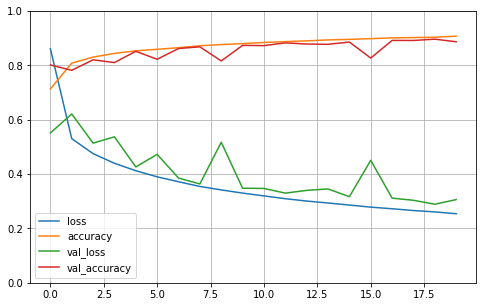

In [14]:
pd.DataFrame(model_cnn_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
cnn_evaluation = model_cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3278 - accuracy: 0.8792


In [16]:
cnn_evaluation

[0.3278447687625885, 0.8791999816894531]

In [17]:
cnn_predict = model_cnn.predict(x_test)

AxesImage(54,36;334.8x217.44)


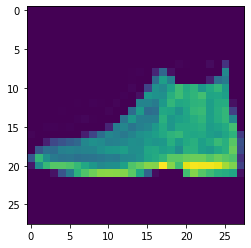

In [18]:
print(plt.imshow(x_test[0].reshape(28,28)))

In [19]:
cnn_predict[0]

array([7.4008560e-05, 6.8775553e-06, 3.3984197e-05, 1.2048979e-05,
       7.4297932e-05, 4.8894566e-03, 3.9315768e-05, 7.9161435e-02,
       1.4464940e-03, 9.1426212e-01], dtype=float32)

* Note that the last in class_names is 'ankle boots' and for 1st observation in test_set the model predicts that the image is of an ankle boot with probability 0.914 which is highest among the all probabilities